In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

In [5]:
# data = pd.read_json('/content/response_1h.json')
# data=data.to_csv('/content/response_1h.csv')
data = pd.read_csv('/content/response_1h.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/response_1h.csv'

In [ ]:
data.sort_values(by=['startTime'])

,Unnamed: 0,startTime,open,high,low,close,endTime,volume
0,0,1721916000000,5600324,5671567,5548113,5669510,1721919599999,2270.348
1,1,1721919600000,5669510,5686792,5643488,5665879,1721923199999,1201.879
2,2,1721923200000,5665713,5699707,5651853,5672100,1721926799999,678.775
3,3,1721926800000,5672100,5690598,5662878,5688209,1721930399999,494.449
4,4,1721930400000,5688209,5700625,5630197,5646235,1721933999999,707.060
...,...,...,...,...,...,...,...,...
1495,1495,1727298000000,5535291,5539860,5526030,5529536,1727301599999,79.443
1496,1496,1727301600000,5528812,5535988,5494254,5514310,1727305199999,521.077
1497,1497,1727305200000,5513587,5514886,5485203,5503358,1727308799999,228.786
1498,1498,1727308800000,5503524,5515331,5476256,5485386,1727312399999,272.783


In [ ]:
1727301599999-1727298000000

3599999

In [ ]:
data.shape

NameError: name 'data' is not defined

In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
data.isnull().sum()  # no null values in data

,0
startTime,0
open,0
high,0
low,0
close,0
endTime,0
volume,0


In [ ]:
data.drop(['endTime'], axis=1, inplace=True)

In [ ]:
data.head()

,startTime,open,high,low,close,volume
0,1721916000000,5600324,5671567,5548113,5669510,2270.348
1,1721919600000,5669510,5686792,5643488,5665879,1201.879
2,1721923200000,5665713,5699707,5651853,5672100,678.775
3,1721926800000,5672100,5690598,5662878,5688209,494.449
4,1721930400000,5688209,5700625,5630197,5646235,707.060


In [ ]:
data['interval']=24*60
data.head(10)

,Unnamed: 0,startTime,open,high,low,close,endTime,volume,interval
0,0,1721916000000,5600324,5671567,5548113,5669510,1721919599999,2270.348,1440
1,1,1721919600000,5669510,5686792,5643488,5665879,1721923199999,1201.879,1440
2,2,1721923200000,5665713,5699707,5651853,5672100,1721926799999,678.775,1440
3,3,1721926800000,5672100,5690598,5662878,5688209,1721930399999,494.449,1440
4,4,1721930400000,5688209,5700625,5630197,5646235,1721933999999,707.060,1440
5,5,1721934000000,5646332,5684910,5631080,5656315,1721937599999,687.869,1440
6,6,1721937600000,5657077,5710872,5633443,5709340,1721941199999,729.368,1440
7,7,1721941200000,5709340,5772218,5702200,5757614,1721944799999,1159.287,1440
8,8,1721944800000,5756905,5785842,5739616,5740132,1721948399999,545.354,1440
9,9,1721948400000,5740132,5755260,5738758,5753248,1721951999999,208.241,1440


<Axes: >

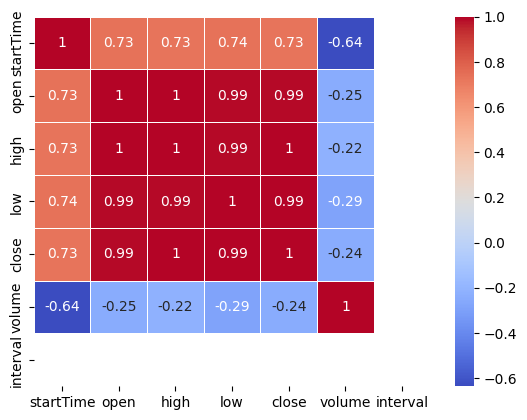

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# shows the high correlation among open high low close

In [ ]:
# 10-period Simple Moving Average for the 'close' prices
data['SMA_10'] = data['close'].rolling(window=10).mean()
# Example for a 50-period SMA
data['SMA_50'] = data['close'].rolling(window=50).mean()


In [ ]:
data.head()

,Unnamed: 0,startTime,open,high,low,close,endTime,volume,interval,SMA_10,SMA_50
0,0,1721916000000,5600324,5671567,5548113,5669510,1721919599999,2270.348,1440,NaN,NaN
1,1,1721919600000,5669510,5686792,5643488,5665879,1721923199999,1201.879,1440,NaN,NaN
2,2,1721923200000,5665713,5699707,5651853,5672100,1721926799999,678.775,1440,NaN,NaN
3,3,1721926800000,5672100,5690598,5662878,5688209,1721930399999,494.449,1440,NaN,NaN
4,4,1721930400000,5688209,5700625,5630197,5646235,1721933999999,707.060,1440,NaN,NaN


In [ ]:
data.rename(columns={'SMA_10': 'close_MA_10'}, inplace=True)

In [ ]:
data.rename(columns={'SMA_50': 'close_MA_50'}, inplace=True)

In [ ]:
data.head(10)

,startTime,open,high,low,close,volume,interval,close_MA_10,close_MA_50,open_MA_10,open_MA_50
0,1721916000000,5600324,5671567,5548113,5669510,2270.348,1440,NaN,NaN,NaN,NaN
1,1721919600000,5669510,5686792,5643488,5665879,1201.879,1440,NaN,NaN,NaN,NaN
2,1721923200000,5665713,5699707,5651853,5672100,678.775,1440,NaN,NaN,NaN,NaN
3,1721926800000,5672100,5690598,5662878,5688209,494.449,1440,NaN,NaN,NaN,NaN
4,1721930400000,5688209,5700625,5630197,5646235,707.060,1440,NaN,NaN,NaN,NaN
5,1721934000000,5646332,5684910,5631080,5656315,687.869,1440,NaN,NaN,NaN,NaN
6,1721937600000,5657077,5710872,5633443,5709340,729.368,1440,NaN,NaN,NaN,NaN
7,1721941200000,5709340,5772218,5702200,5757614,1159.287,1440,NaN,NaN,NaN,NaN
8,1721944800000,5756905,5785842,5739616,5740132,545.354,1440,NaN,NaN,NaN,NaN
9,1721948400000,5740132,5755260,5738758,5753248,208.241,1440,5695858.2,NaN,5680564.2,NaN


In [ ]:
data['open_MA_10'] = data['open'].rolling(window=10).mean()
# Example for a 50-period SMA
data['open_MA_50'] = data['open'].rolling(window=50).mean()

In [ ]:
data.head(1)

,startTime,open,high,low,close,volume,interval,close_MA_10,close_MA_50,open_MA_10,open_MA_50
0,1721916000000,5600324,5671567,5548113,5669510,2270.348,1440,NaN,NaN,NaN,NaN


In [ ]:
# Calculate the differences in 'close' prices
delta = data['close'].diff()

# Calculate gains and losses
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

# Calculate the Relative Strength (RS)
RS = gain / loss

# Calculate RSI
data['RSI'] = 100 - (100 / (1 + RS))
